___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
import pandas_datareader.data as web

import pandas as pd

import datetime as dt

BAC = web.DataReader('BAC', 'yahoo', start='2019-09-10', end='2021-10-09')
C = web.DataReader('C', 'yahoo', start='2019-09-10', end='2021-10-09')
GS = web.DataReader('GS', 'yahoo', start='2019-09-10', end='2021-10-09')
JPM = web.DataReader('JPM', 'yahoo', start='2019-09-10', end='2021-10-09')
MS = web.DataReader('MS', 'yahoo', start='2019-09-10', end='2021-10-09')
WFC = web.DataReader('WFC', 'yahoo', start='2019-09-10', end='2021-10-09')


In [17]:
import seaborn as sns

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2019-09-09   28.850000  27.969999  28.000000  28.629999  68629300.0   
2019-09-10   29.350000  28.809999  28.889999  29.350000  71066200.0   
2019-09-11   29.469999  28.900000  29.370001  29.459999  53982200.0   
2019-09-12   29.799999  28.910000  29.219999  29.670000  72943900.0   
2019-09-13   30.320000  29.870001  30.000000  30.170000  79657000.0   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2019-09-09   27.074686  69.300003  66.690002  66.760002  68.790001  ...   
2019-09-10   27.755575  70.010002  68.449997  69.180000  68.980003  ...   
2019-09-11   27.859598  69.209999  68.110001  68.720001  68.900002  ...   
2019-09-12   28.058191  70.059998  67.930000  68.110001  69.300003  ...   
2019-09-13   28.531029  70.739998  69.849998  70.339996  70.389999  ...   

Bank Ticker         MS                                          WFC  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2019-09-09   42.540001  43.110001  11888800.0  39.946953  48.639999   
2019-09-10   43.279999  43.580002  12292700.0  40.382469  48.930000   
2019-09-11   43.740002  43.939999   9877900.0  40.716049  48.980000   
2019-09-12   43.509998  44.320000  13254300.0  41.068176  49.080002   
2019-09-13   44.950001  45.160000  11364500.0  41.846539  49.360001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2019-09-09   46.889999  47.320000  48.410000  27651400.0  45.028641  
2019-09-10   48.070000  48.070000  48.310001  25822400.0  44.935623  
2019-09-11   47.790001  48.290001  48.849998  19190000.0  45.437901  
2019-09-12   48.220001  48.520000  48.650002  24305900.0  45.251884  
2019-09-13   48.660000  49.009998  48.919998  25142400.0  45.503010  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [11]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 44.34000015258789
C 81.91000366210938
GS 419.69000244140625
JPM 170.22000122070312
MS 105.44999694824219
WFC 54.459999084472656


In [13]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     44.340000
C       81.910004
GS     419.690002
JPM    170.220001
MS     105.449997
WFC     54.459999
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [15]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.025148,0.002762,0.017219,0.012738,0.010902,-0.002066
2019-09-11,0.003748,-0.001160,0.005426,0.002738,0.008261,0.011178
2019-09-12,0.007128,0.005806,0.008948,0.006144,0.008648,-0.004094
2019-09-13,0.016852,0.015729,0.005303,0.019676,0.018953,0.005550


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

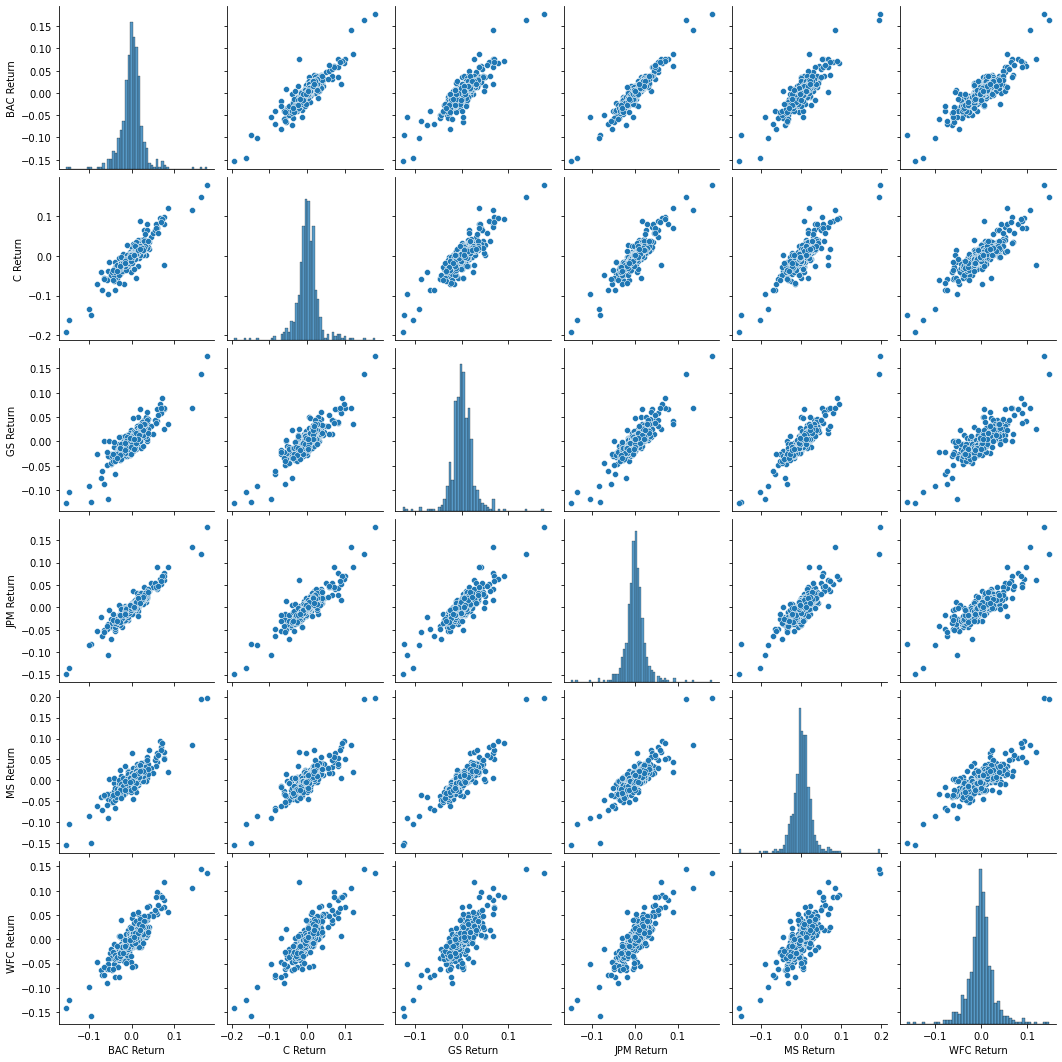

In [18]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 5 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [20]:
returns.idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [21]:
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2020?**

In [22]:
returns.std()

BAC Return    0.027765
C Return      0.031582
GS Return     0.025164
JPM Return    0.025462
MS Return     0.027375
WFC Return    0.030026
dtype: float64

In [27]:
returns.loc['2020-01-01':'2020-12-31'].std()

BAC Return    0.036933
C Return      0.042502
GS Return     0.032929
JPM Return    0.034272
MS Return     0.036164
WFC Return    0.038573
dtype: float64

** Create a distplot using seaborn of the 2020 returns for Morgan Stanley **

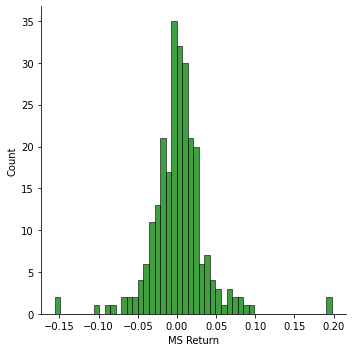

In [28]:
sns.displot(returns.loc['2020-01-01':'2020-12-31']['MS Return'],color='green',bins=50)

** Create a distplot using seaborn of the 2019 returns for CitiGroup **

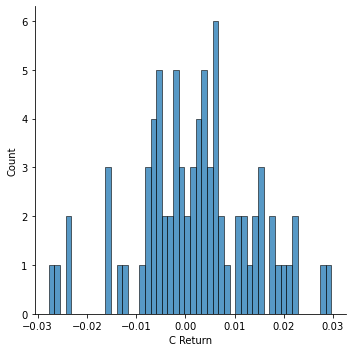

In [30]:
sns.displot(returns.loc['2019-01-01':'2019-12-31']['C Return'],bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

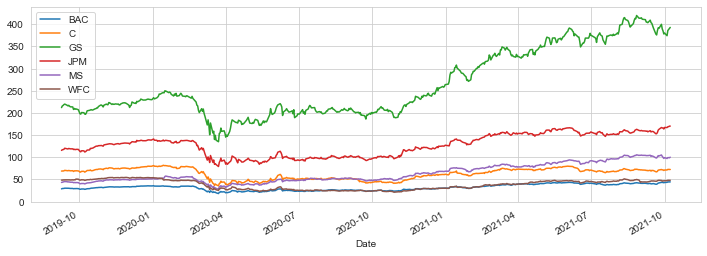

In [33]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

In [36]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2020**

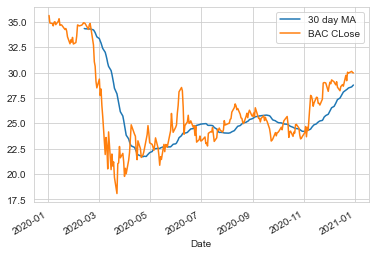

In [46]:
start = BAC.index.searchsorted(dt.datetime(2020, 1, 1))
end = BAC.index.searchsorted(dt.datetime(2020, 12, 31))
BAC['Close'].iloc[start:end].rolling(window=30).mean().plot(label='30 day MA')
BAC['Close'].iloc[start:end].plot(label='BAC CLose')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

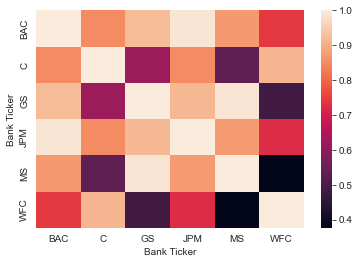

In [48]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr())

** Optional: Use seaborn's clustermap to cluster the correlations together:**

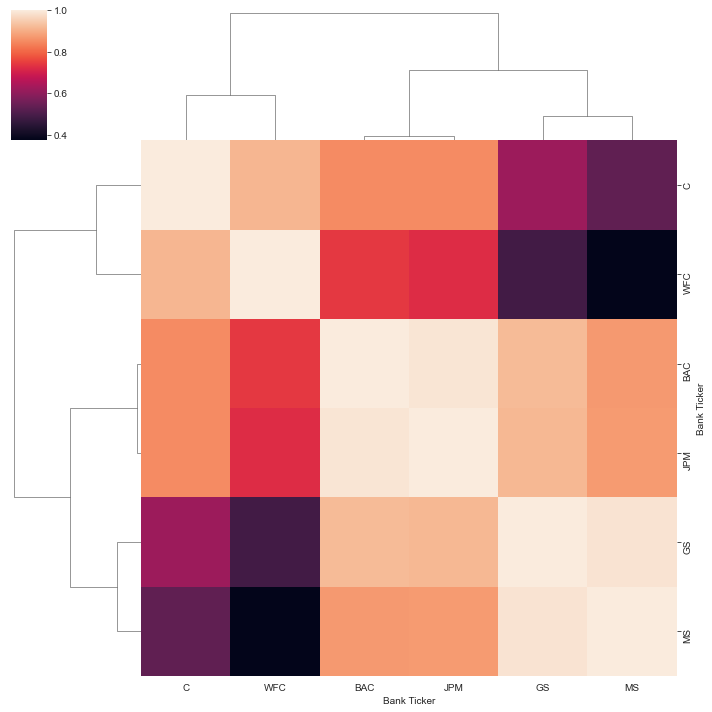

In [49]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr())

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.